## <font color = 'blue'> Demand, Supply, and Surplus

### <font color = 'green'> Models  
  
Demand:  Q(p) = a - b⋅p  
Inverse demand:  p(Q) = (a - Q)/b  
      
Supply:  Q = c + d⋅p  
Inverse supply:  p(Q) = (Q - c)/d

In [2]:
# Load resources

from scipy.integrate import quad
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib.patches import PathPatch

In [3]:
# Create functions to solve for market outcomes

class Market:

    def __init__(self, a, b, c, d):
        self.a = a
        self.b = b
        self.c = c
        self.d = d
        if a < c:
            raise ValueError('Insufficient demand!')    

    def price(self):
        # Returns equilibrium price
        return (self.a - self.c) / (self.d + self.b)

    def quantity(self):
        # Returns equilibrium quantity
        return self.a - self.b * self.price()

    def inverse_demand(self, x):
        return (self.a - x) / self.b

    def inverse_supply(self, x):
        return (x - self.c) / self.d

    def consumer_surplus(self):
        integrand = lambda x: (self.a - x) / self.b
        area, error = quad(integrand, 0, self.quantity())
        return area - self.price() * self.quantity()

    def producer_surplus(self):
        integrand = lambda x: (x - self.c) / self.d
        area, error = quad(integrand, 0, self.quantity())
        return self.price() * self.quantity() - area

In [4]:
# Set demand and supply parameters

a = 15
b = 0.5
c = -2
d = 0.5

m = Market(a, b, c, d)

In [6]:
print('\nEquilibrium Price = ', m.price())
print('\nEquilibrium Quantity = ', m.quantity(), '\n')


Equilibrium Price =  17.0

Equilibrium Quantity =  6.5 



In [7]:
print('\nConsumer Surplus =', m.consumer_surplus())
print('\nProducer Surplus =', m.producer_surplus(), '\n')


Consumer Surplus = 42.25

Producer Surplus = 42.25 



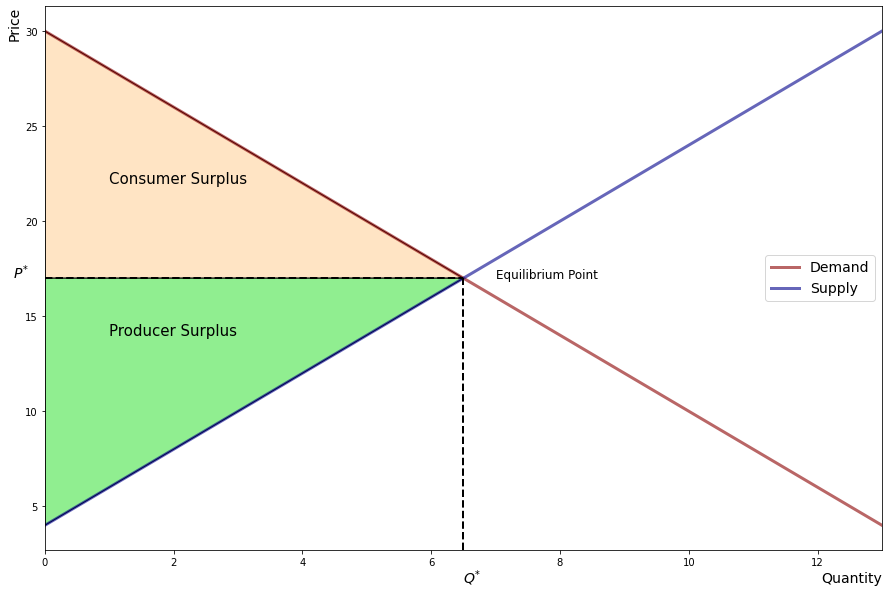

In [26]:
# Plot the inverse demand and inverse supply curves and shade areas giving consumer and producer surplus

q_max = m.quantity() * 2
q_grid = np.linspace(0.0, q_max, 100)

pd = m.inverse_demand(q_grid)
ps = m.inverse_supply(q_grid)

fig, ax = plt.subplots(figsize = (15, 10))
 
ax.plot(q_grid, pd, lw = 3, alpha=0.6, label = 'Demand', color = 'darkred')
ax.plot(q_grid, ps, lw = 3, alpha=0.6, label = 'Supply', color = 'darkblue')

ax.axhline(17,0,0.5, linewidth = 2, color = 'black', linestyle = 'dashed')
ax.axvline(6.5,0,0.5, linewidth = 2, color = 'black', linestyle = 'dashed')

path1 = Path([[0,17],[0,30],[6.5,17],[0,17]])
patch1 = PathPatch(path1, facecolor = 'bisque')
ax.add_patch(patch1) 

path2 = Path([[0,4],[0,17],[6.5,17],[0,4]])
patch2 = PathPatch(path2, facecolor = 'lightgreen')
ax.add_patch(patch2)

ax.text(7, 17, 'Equilibrium Point', fontsize = 12)
ax.text(1, 22, 'Consumer Surplus', fontsize = 15)
ax.text(1, 14, 'Producer Surplus', fontsize = 15)

ax.text(-0.5, 17, '$P^{*}$', fontsize = 14)
ax.text(6.5, 1, '$Q^{*}$', fontsize = 14)

ax.set_xlabel('Quantity', loc = 'right', fontsize = 14)
ax.set_xlim(0, q_max)
ax.set_ylabel('Price', loc = 'top', fontsize = 14)
ax.legend(loc = 'best', fontsize = 14)